In [1]:
#importing neccesary libraries
import numpy as np,pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
#checking the statisicall parameters
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [4]:
#getting to know the data and there format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
# checking the missing values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

### univariant analysis


In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [7]:
#dropping the unique identifer column
print(df.shape)
df.drop('name',axis=1,inplace=True)
print(df.shape)

(4340, 8)
(4340, 7)


In [8]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [9]:
# checking for unique classes
df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

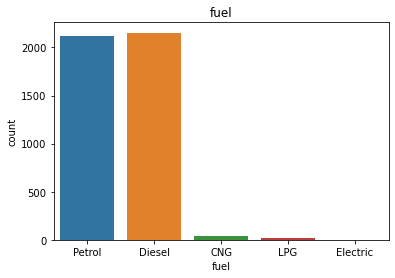

In [10]:
#visualizing the column
sns.countplot(df['fuel'])
plt.title('fuel')
plt.show()

In [11]:
#checking counts of classes in percentage
df['fuel'].value_counts()/len(df)*100

Diesel      49.608295
Petrol      48.917051
CNG          0.921659
LPG          0.529954
Electric     0.023041
Name: fuel, dtype: float64

### because the last three classes have very less values. we will drop them

In [12]:
#creating dataframe with the fuel column containing petrol and diesel
data = df[(df['fuel'] == 'Petrol') | (df['fuel'] == 'Diesel')]
data['fuel'].value_counts()


Diesel    2153
Petrol    2123
Name: fuel, dtype: int64

In [13]:
#label encoding the classes
data['fuel'] = data['fuel'].map({'Diesel':1,'Petrol':2})
data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,2,Individual,Manual,First Owner
1,2007,135000,50000,2,Individual,Manual,First Owner
2,2012,600000,100000,1,Individual,Manual,First Owner
3,2017,250000,46000,2,Individual,Manual,First Owner
4,2014,450000,141000,1,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4335,2014,409999,80000,1,Individual,Manual,Second Owner
4336,2014,409999,80000,1,Individual,Manual,Second Owner
4337,2009,110000,83000,2,Individual,Manual,Second Owner
4338,2016,865000,90000,1,Individual,Manual,First Owner


In [14]:
# checking values counts in percentage
df.seller_type.value_counts()/len(df)*100

Individual          74.746544
Dealer              22.903226
Trustmark Dealer     2.350230
Name: seller_type, dtype: float64

In [15]:
#we will perform one_hot_encoding
dummy = pd.get_dummies(df.seller_type,prefix='seller_type')
print(df.shape)
df.drop('seller_type',inplace=True,axis=1)
print(df.shape)
df = pd.concat([dummy,df],axis=1)
df

(4340, 7)
(4340, 6)


,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,year,selling_price,km_driven,fuel,transmission,owner
0,0,1,0,2007,60000,70000,Petrol,Manual,First Owner
1,0,1,0,2007,135000,50000,Petrol,Manual,First Owner
2,0,1,0,2012,600000,100000,Diesel,Manual,First Owner
3,0,1,0,2017,250000,46000,Petrol,Manual,First Owner
4,0,1,0,2014,450000,141000,Diesel,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
4335,0,1,0,2014,409999,80000,Diesel,Manual,Second Owner
4336,0,1,0,2014,409999,80000,Diesel,Manual,Second Owner
4337,0,1,0,2009,110000,83000,Petrol,Manual,Second Owner
4338,0,1,0,2016,865000,90000,Diesel,Manual,First Owner


In [16]:
#checking the value counts of the column
df['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [17]:
#we will perform label encoding
df.transmission = df.transmission.map({'Manual':1,'Automatic':2})
df

,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,year,selling_price,km_driven,fuel,transmission,owner
0,0,1,0,2007,60000,70000,Petrol,1,First Owner
1,0,1,0,2007,135000,50000,Petrol,1,First Owner
2,0,1,0,2012,600000,100000,Diesel,1,First Owner
3,0,1,0,2017,250000,46000,Petrol,1,First Owner
4,0,1,0,2014,450000,141000,Diesel,1,Second Owner
...,...,...,...,...,...,...,...,...,...
4335,0,1,0,2014,409999,80000,Diesel,1,Second Owner
4336,0,1,0,2014,409999,80000,Diesel,1,Second Owner
4337,0,1,0,2009,110000,83000,Petrol,1,Second Owner
4338,0,1,0,2016,865000,90000,Diesel,1,First Owner


In [18]:
df.owner.value_counts()/len(df)*100

First Owner             65.253456
Second Owner            25.483871
Third Owner              7.004608
Fourth & Above Owner     1.866359
Test Drive Car           0.391705
Name: owner, dtype: float64

In [19]:
df.owner = df.owner.map({'Third Owner':3,'Fourth & Above Owner':3,'Test Drive Car':3,'Second Owner':2,'First Owner':1})
df

,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,year,selling_price,km_driven,fuel,transmission,owner
0,0,1,0,2007,60000,70000,Petrol,1,1
1,0,1,0,2007,135000,50000,Petrol,1,1
2,0,1,0,2012,600000,100000,Diesel,1,1
3,0,1,0,2017,250000,46000,Petrol,1,1
4,0,1,0,2014,450000,141000,Diesel,1,2
...,...,...,...,...,...,...,...,...,...
4335,0,1,0,2014,409999,80000,Diesel,1,2
4336,0,1,0,2014,409999,80000,Diesel,1,2
4337,0,1,0,2009,110000,83000,Petrol,1,2
4338,0,1,0,2016,865000,90000,Diesel,1,1


In [20]:
df.fuel.value_counts()/len(df)*100

Diesel      49.608295
Petrol      48.917051
CNG          0.921659
LPG          0.529954
Electric     0.023041
Name: fuel, dtype: float64

In [21]:
df = df[(df['fuel'] == 'Diesel') | (df['fuel'] =='Petrol')]
df['fuel'].value_counts()

Diesel    2153
Petrol    2123
Name: fuel, dtype: int64

In [22]:
df.fuel = df.fuel.map({'Diesel':2,'Petrol':1})
df

,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,year,selling_price,km_driven,fuel,transmission,owner
0,0,1,0,2007,60000,70000,1,1,1
1,0,1,0,2007,135000,50000,1,1,1
2,0,1,0,2012,600000,100000,2,1,1
3,0,1,0,2017,250000,46000,1,1,1
4,0,1,0,2014,450000,141000,2,1,2
...,...,...,...,...,...,...,...,...,...
4335,0,1,0,2014,409999,80000,2,1,2
4336,0,1,0,2014,409999,80000,2,1,2
4337,0,1,0,2009,110000,83000,1,1,2
4338,0,1,0,2016,865000,90000,2,1,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4276 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   seller_type_Dealer            4276 non-null   uint8
 1   seller_type_Individual        4276 non-null   uint8
 2   seller_type_Trustmark Dealer  4276 non-null   uint8
 3   year                          4276 non-null   int64
 4   selling_price                 4276 non-null   int64
 5   km_driven                     4276 non-null   int64
 6   fuel                          4276 non-null   int64
 7   transmission                  4276 non-null   int64
 8   owner                         4276 non-null   int64
dtypes: int64(6), uint8(3)
memory usage: 246.4 KB


In [24]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(labels=['selling_price'],axis=1),df['selling_price'],test_size=0.3,random_state=0)


In [26]:
x_train

,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,year,km_driven,fuel,transmission,owner
3853,0,1,0,2013,100000,2,1,1
2164,0,1,0,2013,100000,2,1,2
1440,0,1,0,2006,73756,2,1,1
4054,0,1,0,2017,20000,1,1,1
3710,0,1,0,2013,20000,2,1,3
...,...,...,...,...,...,...,...,...
1049,0,1,0,2017,28838,1,1,1
3310,0,1,0,2014,30000,2,1,1
1675,0,1,0,2007,54000,1,1,1
2643,0,1,0,2016,90000,2,1,3


In [28]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(x_train,y_train)
mutual_info

array([0.07825043, 0.09847284, 0.04114407, 0.42187716, 0.10947589,
       0.11804719, 0.13171311, 0.09611418])

In [29]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

year                            0.421877
transmission                    0.131713
fuel                            0.118047
km_driven                       0.109476
seller_type_Individual          0.098473
owner                           0.096114
seller_type_Dealer              0.078250
seller_type_Trustmark Dealer    0.041144
dtype: float64

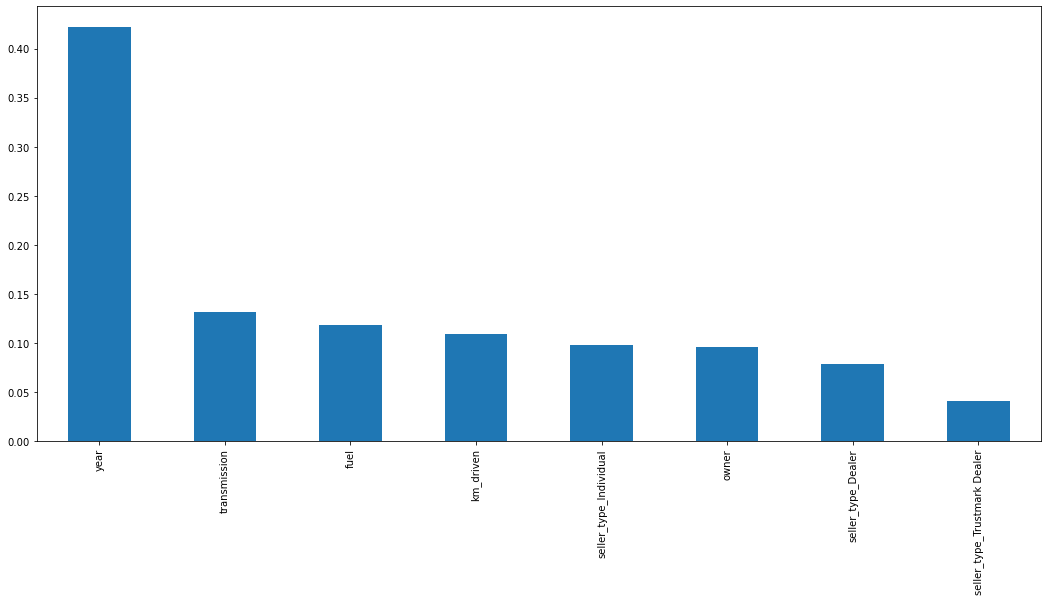

In [33]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(18,8))
plt.show()

In [42]:
from sklearn.feature_selection import SelectPercentile
selected_cols = SelectPercentile(mutual_info_regression,percentile=20)
selected_cols.fit(x_train,y_train)
x_train.columns[selected_cols.get_support(0)]


Index(['year', 'transmission'], dtype='object')